<a href="https://colab.research.google.com/github/enikolaev/Sentinel2Imaginary/blob/main/Indexes_From_Tiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/enikolaev/Sentinel2Imaginary/refs/heads/main/indexes_calculate.py

--2024-11-19 17:06:45--  https://raw.githubusercontent.com/enikolaev/Sentinel2Imaginary/refs/heads/main/indexes_calculate.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6268 (6.1K) [text/plain]
Saving to: ‘indexes_calculate.py’

indexes_calculate.p 100%[===================>]   6.12K  --.-KB/s    in 0s      

2024-11-19 17:06:45 (31.0 MB/s) - ‘indexes_calculate.py’ saved [6268/6268]



In [5]:
!wget https://github.com/enikolaev/Sentinel2Imaginary/raw/refs/heads/main/data/0_2017-01-11_08-23.tiff

--2024-11-19 17:08:52--  https://github.com/enikolaev/Sentinel2Imaginary/raw/refs/heads/main/data/0_2017-01-11_08-23.tiff
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/enikolaev/Sentinel2Imaginary/refs/heads/main/data/0_2017-01-11_08-23.tiff [following]
--2024-11-19 17:08:52--  https://raw.githubusercontent.com/enikolaev/Sentinel2Imaginary/refs/heads/main/data/0_2017-01-11_08-23.tiff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447796 (437K) [image/tiff]
Saving to: ‘0_2017-01-11_08-23.tiff’

0_2017-01-11_08-23. 100%[===================>] 437.30K  --.-KB/s    in 0.05s   

2024-11-19 17:08:53

In [23]:
import cv2
import tifffile
from indexes_calculate import Indexes

indexes = Indexes()

# Вывод на консоль допустимых имён индексов, для которых предусмотрена реализация
print(indexes.get_available_index_names())

# читаем 15тиканальное изображение
from tifffile import imread, imwrite
path_to_original_img = "0_2017-01-11_08-23.tiff"

output_path = './'

# Извлечём индекс SR из снимка
original_img = imread(path_to_original_img)
SR_index = indexes.get_index("SR", original_img)

# сохраним этот индекс в tiff и в цвете
imwrite(output_path + "test_SR.tiff", SR_index)
cv2.imwrite(output_path + "test_SR.png", indexes.get_color_from_index(SR_index))

# Извлечём все доступные индексы из изображения и сохраним каждый по названию индекса
all_indexes_from_one_image = indexes.create_all_indexes_from_img(original_img)
for index_name, index_image in all_indexes_from_one_image.items():
    imwrite(output_path + f"test_{index_name}.tiff", index_image)
    cv2.imwrite(output_path + f"test_{index_name}.png", indexes.get_color_from_index(index_image))

['NDWI', 'NDMI', 'NDVI', 'SR', 'EVI', 'EVI2', 'ARVI', 'SAVI', 'GOSAVI', 'GARI', 'VARI']


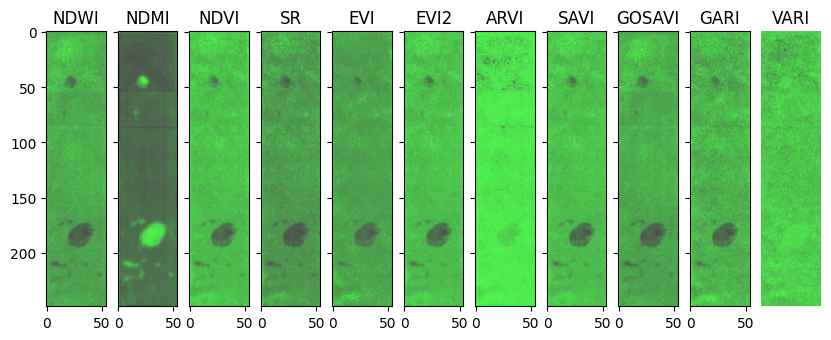

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

all_indexes = indexes.get_available_index_names()
RAWS = 1
COLS = len(all_indexes)


fig, ax = plt.subplots(nrows=RAWS, ncols=COLS, figsize=(10,100), sharey=True, sharex=True)
for i, axi in enumerate(ax.flat):
  index_name = all_indexes[i]
  img = mpimg.imread(f"test_{index_name}.png")
  axi.imshow(img, alpha=0.7)
  plt.axis('off')
  axi.set_title(index_name)
plt.show()